# Spam comments

### Riddler Classic 10/04/2020

> Over the course of three days, suppose the probability of any spammer making a new comment on this week’s Riddler column over a very short time interval is proportional to the length of that time interval. (For those in the know, I’m saying that spammers follow a Poisson process.) On average, the column gets one brand-new comment of spam per day that is not a reply to any previous comments. Each spam comment or reply also gets its own spam reply at an average rate of one per day.
> 
> For example, after three days, I might have four comments that were not replies to any previous comments, and each of them might have a few replies (and their replies might have replies, which might have further replies, etc.).
> 
> After the three days are up, how many total spam posts (comments plus replies) can I expect to have?

In [13]:
import math
import matplotlib.pyplot as plt; plt.style.use('ggplot')

check_range = 10

The formula for Poisson processes:

$$P(k{\text{ events in interval}}) = {\frac {\lambda ^{k}e^{-\lambda }}{k!}}$$

Start by looking at the resolution of one day at a time. Probability of k spam comments per day?

0 spam comments per day: 0.36787944117144233
1 spam comments per day: 0.36787944117144233
2 spam comments per day: 0.18393972058572117
3 spam comments per day: 0.061313240195240384
4 spam comments per day: 0.015328310048810096
5 spam comments per day: 0.0030656620097620196
6 spam comments per day: 0.0005109436682936699
7 spam comments per day: 7.299195261338141e-05
8 spam comments per day: 9.123994076672677e-06
9 spam comments per day: 1.0137771196302974e-06


Text(0, 0.5, 'Probability')

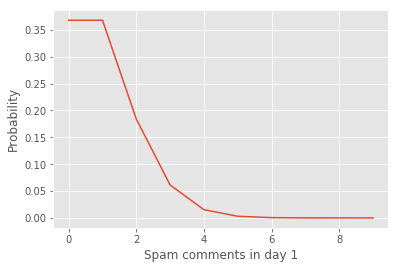

In [11]:
daily_comments = lambda k: 1 / (math.factorial(k) * math.e)

comment_prob = []

for k in range(check_range):
    print('{} spam comments per day: {}'.format(k, daily_comments(k)))
    comment_prob.append(daily_comments(k))

plt.plot(comment_prob)
plt.xlabel('Spam comments in day 1')
plt.ylabel('Probability')

Probability of k replies to those spam comments the next day?

In [39]:
daily_replies = lambda k, r: (k ** r) * (math.e ** (-k)) / (math.factorial(r))

replies_for_comments = {}
for r in range(check_range):
    replies_for_comments[r] = []

In [40]:
for k in range(check_range):
    if k == 0:
        prob = daily_comments(k)
        print('0 prev comments, 0 replies: {}'.format(prob))
        replies_for_comments[k].append(prob)
    else:
        for r in range(check_range):
            day1comments = daily_comments(k)
            day2replies = daily_replies(day1comments, r)
            prob = day2replies * day1comments
            print('{} prev comments, {} replies: {}'.format(k, r, prob))
            replies_for_comments[k].append(prob)

0 prev comments, 0 replies: 0.36787944117144233
1 prev comments, 0 replies: 0.25464638004358253
1 prev comments, 1 replies: 0.09367916798676387
1 prev comments, 2 replies: 0.01723131998418818
1 prev comments, 3 replies: 0.0021130161221431516
1 prev comments, 4 replies: 0.0001943337975500677
1 prev comments, 5 replies: 1.429828176868862e-05
1 prev comments, 6 replies: 8.76673984462832e-07
1 prev comments, 7 replies: 4.607290507053262e-08
1 prev comments, 8 replies: 2.1186593213115566e-09
1 prev comments, 9 replies: 8.660124523964029e-11
2 prev comments, 0 replies: 0.1530352638991777
2 prev comments, 1 replies: 0.028149263681376848
2 prev comments, 2 replies: 0.0025888838481231235
2 prev comments, 3 replies: 0.0001587328572175513
2 prev comments, 4 replies: 7.2993193510923886e-06
2 prev comments, 5 replies: 2.685269523811763e-07
2 prev comments, 6 replies: 8.232128765121471e-09
2 prev comments, 7 replies: 2.1631649498316021e-10
2 prev comments, 8 replies: 4.9736494556606296e-12
2 prev co

Total probability of all enumerated options: 0.99999989


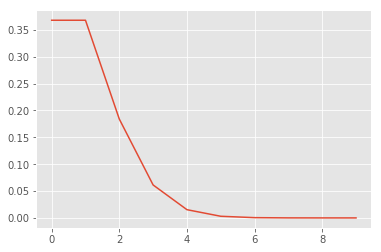

In [53]:
total_prob = sum([sum(replies_for_comments[k]) for k in replies_for_comments.keys()])
print('Total probability of all enumerated options: {0:.8f}'.format(total_prob))

plt.plot([sum(replies_for_comments[k]) for k in replies_for_comments.keys()])

# This is exactly the same as the previous graph??

Follow this day resolution thread to the end:

- Have a day 3, making sure replies can be nested => have a total 'replyable comments' count as k
- Get the expected value
- Plot the distribution -- how? Could do # comments / # replies heatmap?

Then increase the resolution. Note ${\displaystyle P(k{\text{ events in interval }}t)={\frac {(rt)^{k}e^{-rt}}{k!}}}$

In [55]:
# replies_for_comments